#  Classification avec des images réelles: dogs vs cats


Le dataset complet provient d'une compétition Kaggle: https://www.kaggle.com/c/dogs-vs-cats

Le dataset en question contient 2 folders: dogs - cats

Soit un total de 2000 images.

L'objectif est de capitaliser sur les notions du cours pour développer un réseau CNN qui arrive à prédire avec la meilleure performance possible les images de chiens et de chats.

Ce notebook va permettre de structurer l'approche et la construction du modèle.

### Livrables à remettre: 

#### 1 - Ce notebook rempli avec les outputs visibles
#### 2 - Le lien URL de votre application web en section 12

## 1- Importer des librairies pertinentes:

In [1]:
# Importer les librairies utiles
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 2- Localiser le path où se trouvent toutes les images

In [2]:
# Définir la variable du path des images
my_data_dir = '/Users/ABdo/Desktop/DL/final_project/data_cats_and_dogs'

### 2.1 - Vérifier que la commande ci-dessous retourne ['train', 'validation']

In [3]:
# Lire le contenu du path des images
os.listdir(my_data_dir)

['train', 'validation']

### 2.2 - Définir les variables train_path et val_path:

In [4]:
# Définir les variables des paths des images de train et de validation
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'

In [5]:
# Lire le contenu du path des images de train
os.listdir(train_path)

['cats', 'dogs']

In [6]:
# Lire le contenu du path des images de validation
os.listdir(val_path)

['cats', 'dogs']

### 2.3 - Print le nombre d'images pour chaque class (cats & dogs) dans le dossier train et validation:

In [7]:
# Vérifier le nombre d'images de chaque classe pour le train_path et le val_path
print("* Nombre d'images dans train_path :")
print("Classe 'cats' : ", len(os.listdir(train_path + '/cats')))
print("Classe 'dogs' : ", len(os.listdir(train_path + '/dogs')))
print("Total' : ", len(os.listdir(train_path + '/cats')) + len(os.listdir(train_path + '/dogs')))
print("* Nombre d'images dans val_path :")
print("Classe 'cats' : ", len(os.listdir(val_path + '/cats')))
print("Classe 'dogs' : ", len(os.listdir(val_path + '/dogs')))
print("Total' : ", len(os.listdir(val_path + '/cats')) + len(os.listdir(val_path + '/dogs')))

* Nombre d'images dans train_path :
Classe 'cats' :  1000
Classe 'dogs' :  1000
Total' :  2000
* Nombre d'images dans val_path :
Classe 'cats' :  500
Classe 'dogs' :  500
Total' :  1000


Nous constatons que le nombre des images est équilibré entre les deux classes 'Cats' et 'Dogs'

## 3) Analyse d'exemples d'images dogs and cats

### 3.1 - Choisir au hasard une image de dog dans le train_path

In [8]:
# Récupérer le path d'une image de dog
dog_path = train_path + '/dogs/' + os.listdir(train_path + '/dogs')[250]
dog_path

'/Users/ABdo/Desktop/DL/final_project/data_cats_and_dogs/train/dogs/dog.323.jpg'

### 3.2 - Transformer cette image en numpy array

In [31]:
# Lire l'image sous forme d'un array
dog_array = imread(dog_path)
dog_array

array([[[127,  98,  92],
        [138, 109, 103],
        [145, 117, 113],
        ...,
        [147, 136, 140],
        [147, 136, 140],
        [147, 136, 140]],

       [[139, 101,  98],
        [126,  88,  85],
        [121,  86,  84],
        ...,
        [202, 187, 190],
        [204, 189, 192],
        [206, 191, 194]],

       [[114,  68,  68],
        [107,  61,  61],
        [112,  68,  69],
        ...,
        [247, 227, 228],
        [248, 228, 229],
        [249, 229, 230]],

       ...,

       [[190, 207, 189],
        [173, 190, 172],
        [136, 153, 135],
        ...,
        [205, 184, 167],
        [194, 172, 158],
        [186, 164, 151]],

       [[176, 189, 179],
        [192, 208, 195],
        [168, 184, 171],
        ...,
        [203, 180, 166],
        [216, 192, 180],
        [226, 202, 190]],

       [[240, 253, 246],
        [238, 251, 244],
        [235, 248, 241],
        ...,
        [166, 142, 130],
        [161, 137, 125],
        [160, 133, 124]]

### 3.3 - Vérifier les dimensions de cette image

In [32]:
# Afficher les dimensions de l'image
dog_array.shape

(408, 365, 3)

### 3.4 -Plot cette image via 'imshow'

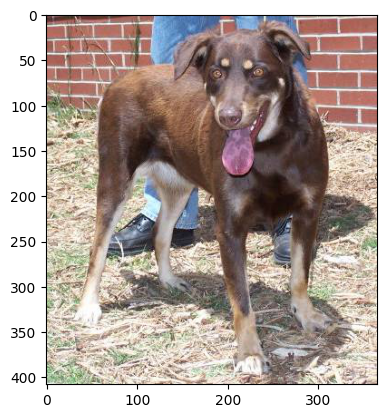

In [33]:
# Afficher l'image
plt.imshow(dog_array)
plt.show()

### 3.5 - Refaire le même travail avec l'image d'un cat depuis le dossier train 

In [34]:
# Récupérer le path d'une image de cat
cat_path = train_path + '/cats/' + os.listdir(train_path + '/cats')[250]
cat_path

'/Users/ABdo/Desktop/DL/final_project/data_cats_and_dogs/train/cats/cat.323.jpg'

In [35]:
# Lire l'image sous forme d'un array
cat_array = imread(cat_path)
cat_array

array([[[225, 169, 110],
        [225, 169, 110],
        [226, 170, 111],
        ...,
        [157, 109,  71],
        [157, 109,  71],
        [158, 110,  72]],

       [[225, 169, 110],
        [225, 169, 110],
        [226, 170, 111],
        ...,
        [161, 113,  75],
        [161, 113,  75],
        [161, 113,  75]],

       [[225, 169, 110],
        [225, 169, 110],
        [226, 170, 111],
        ...,
        [158, 110,  72],
        [158, 110,  72],
        [159, 111,  73]],

       ...,

       [[228, 177, 112],
        [229, 178, 113],
        [229, 178, 113],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[227, 176, 111],
        [227, 176, 111],
        [228, 177, 112],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[226, 175, 110],
        [227, 176, 111],
        [228, 177, 112],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]]

In [36]:
# Afficher les dimensions de l'image
cat_array.shape

(384, 499, 3)

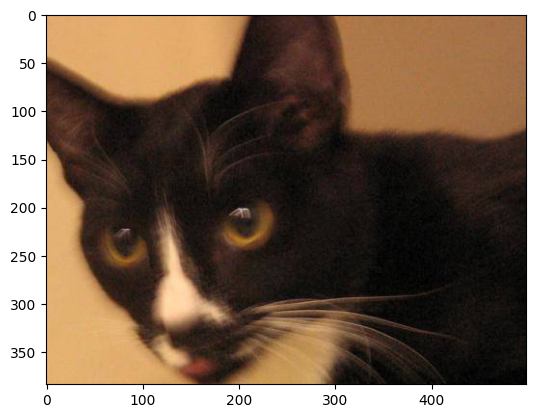

In [37]:
# Afficher l'image
plt.imshow(cat_array)
plt.show()

## 4) Créer un ImageDataGenerator qui effectue un retraitement "pertinent" de ces images:

In [9]:
# Importer l'objet ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Créer un générateur pour la Normalisation des pixels
image_generator = ImageDataGenerator(rescale=1/255)

## 5) Construire un modèle CNN from scratch pour la classification binaire de ces images:


**- Utiliser à minima les types layers suivants: Conv2D, MaxPooling2D, Dense.**

**- Utiliser également la technique du Dropout.**

**- Prendre un input_shape arbitraire fixe et approprié**

**- Print le model summary**

**- Ne pas hésiter à ajouter des techniques ou des méthodes sur les données ou le modèle pour améliorer la performance !**

**L'objectif est de maximiser l'accuracy sur les données de test**

In [11]:
# Importer les librairies de modélisation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [41]:
# Calculer la moyenne des deux dimensions de l'ensemble des images de train_path (cats et dogs)
train_cats = [train_path + '/cats/' + img for img in os.listdir(train_path + '/cats')]
train_dogs = [train_path + '/dogs/' + img for img in os.listdir(train_path + '/dogs')]
train_images = train_cats + train_dogs

train_images_dim1 = [imread(img).shape[0] for img in train_images]
train_images_dim2 = [imread(img).shape[1] for img in train_images]

print("Moyenne de la 1ère dimension des images : ", round(np.mean(train_images_dim1)))
print("Moyenne de la 2ème dimension des images : ", round(np.mean(train_images_dim2)))

Moyenne de la 1ère dimension des images :  359
Moyenne de la 2ème dimension des images :  404


In [12]:
# Fixer la demansion des images pour la modélisation
image_shape = (360, 360, 3)

In [67]:
# Créer le modèle CNN

# Initialiser le modèle
model = Sequential()

# Ajouter des couches convolutionnelles et de pooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=image_shape))   
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Aplatir les données pour les connecter aux couches denses
model.add(Flatten())

# Ajouter une couche dense
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Ajouter une couche dense pour l'output avec un seul neurone (classification binaire)
model.add(Dense(1, activation='sigmoid')) 

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  


In [68]:
# Résumé du modèle
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 179, 179, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,486,593 (9.49 MB)

 Trainable params: 2,486,593 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

### 5.2 Créer une instance de EarlyStopping

In [13]:
# Créer un objet EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

### 5.3 Créer un generator pour le train et validation set: 

In [14]:
# Créer le générateur d'images train_image_generator
train_image_generator =image_generator.flow_from_directory( train_path,
                                                            target_size=(360,360),
                                                            color_mode='rgb',
                                                            batch_size=64,
                                                            class_mode='binary'
                                                          )

Found 2000 images belonging to 2 classes.


In [15]:
# Créer le générateur d'images val_image_generator
val_image_generator = image_generator.flow_from_directory(val_path,
                                                          target_size=(360,360),
                                                          color_mode='rgb',
                                                          batch_size=64,
                                                          class_mode='binary',
                                                          shuffle=False
                                                         )

Found 1000 images belonging to 2 classes.


In [16]:
# Vérifier le dictionnaire des classes de train
train_image_generator.class_indices

{'cats': 0, 'dogs': 1}

In [17]:
# Vérifier le dictionnaire des classes de validation
val_image_generator.class_indices

{'cats': 0, 'dogs': 1}

### 5.3 Entrainer le modèle à partir du train_image_generator et utiliser le EarlyStopping

In [74]:
# Entrainer le modèle
model.fit(train_image_generator,
          epochs=30,
          validation_data=val_image_generator,
          callbacks=[early_stop]
         )

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 429ms/step - accuracy: 0.4819 - loss: 0.7218 - val_accuracy: 0.5560 - val_loss: 0.6927
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.5044 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.5209 - loss: 0.6908 - val_accuracy: 0.5970 - val_loss: 0.6804
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.5481 - loss: 0.6838 - val_accuracy: 0.5600 - val_loss: 0.6788
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.5732 - loss: 0.6724 - val_accuracy: 0.5990 - val_loss: 0.6679
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.6326 - loss: 0.6531 - val_accuracy: 0.6920 - val_loss: 0.5887
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.6806 - loss: 0.5942 - val_accuracy: 0.6790 - val_loss: 0.5895
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.7197 - loss: 0.5600 - val_accu

## 8) Evaluation du modèle

### 8.1 Sauvegarder les losses dans un dataframe

In [75]:
# Afficher l'historique de l'accuracy et de la fonction de loss
losses = pd.DataFrame(model.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.4920,0.703221,0.556,0.692665
1,0.5180,0.694074,0.500,0.692288
2,0.5300,0.689635,0.597,0.680409
3,0.5655,0.681410,0.560,0.678807
4,0.5780,0.671981,0.599,0.667851
5,0.6335,0.641150,0.692,0.588750
6,0.6845,0.593630,0.679,0.589490
7,0.7290,0.544535,0.707,0.564458
8,0.7440,0.513791,0.737,0.522853
9,0.7785,0.474726,0.728,0.553823


### 8.2 Plot le training et validation loss 

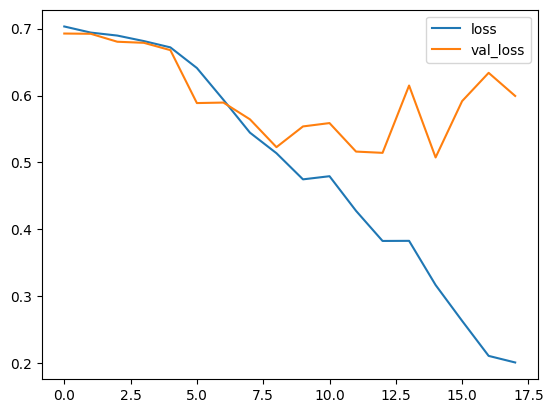

In [76]:
# Afficher le graphe de la fonction de loss pour l'entrainement et la validation
losses[['loss','val_loss']].plot()
plt.show()

### 8.3 Calculer les probabilités pour le validation image generator 

In [77]:
# Prédire les probabilités des images de validation
y_pred_proba = model.predict(val_image_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step


### 8.4 Transformer ces probabilités en classes en prenant un threshold de 0.5

In [78]:
# Transformer les probabilités en classes
y_pred_class = y_pred_proba > 0.5
y_pred_class = np.array([int(x) for x in y_pred_class])
y_pred_class

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### 8.5 Récupérer le vecteur des true labels à partir du validation image generator

In [32]:
# Récupérer les classes réelles des images de validation
y_test = val_image_generator.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.6 Afficher le classification report et la matrice de confusion

In [30]:
# importer les fonctions classification_report et confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
# Afficher le rapport de la classification
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       500
           1       0.80      0.76      0.78       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [82]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, y_pred_class))

[[405  95]
 [119 381]]


### 8.7 KPI final: quel est l'accuracy du model sur les données de test ? Etes-vous satisfaits de la performance de votre modèle ?

L'accuracy de notre modèle sur les données de test est de 79%, ce qui signifie que sa performance est plus au moins modérée. Nous constatons également qu'il y un léger surapprentissage du mdèle puisque l'accuracy sur les données d'entrainement a atteint 91%. Nous remarquons toutefois que les résultats de f1-score sont assez équilibrés entre les deux classes (autour de 79%). 

Ainsi, il pourrait être utile d'optimiser davantage le modèle en utilisant quelques techniques telles que la Data Augmentation et le Transfer Learning.


# 9) Prédictions sur des cas particuliers

### 9.1 Afficher quelques images des données de test où le modèle s'est trompé.

In [83]:
# Récupérer les noms des fichiers des images de test
img_filenames = val_image_generator.filenames

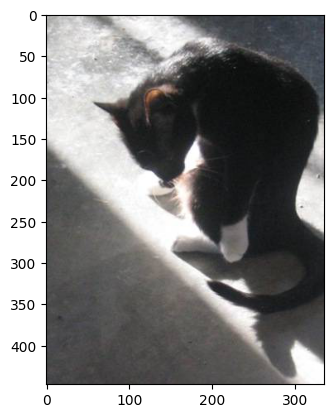

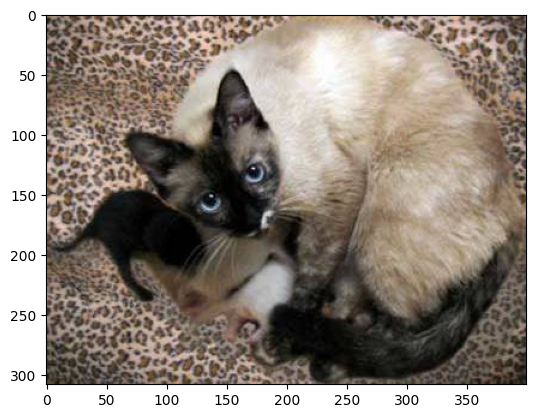

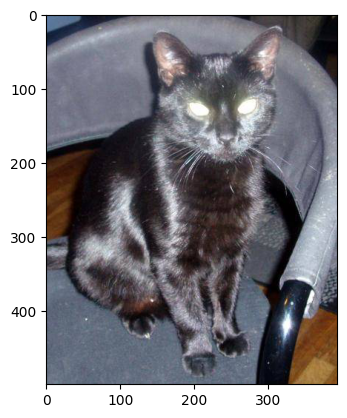

In [85]:
# Afficher 3 images de la classe 'cats' où le modèle s'est trompé
nb = 0
for i in range(len(y_test)):
    if (y_test[i] == 0 and y_pred_class[i] == 1):  # Si la prédiction est incorrecte
        image_path = os.path.join(val_path, img_filenames[i])
        image = imread(image_path)
        plt.imshow(image)
        plt.show()
        nb += 1
        if nb == 3:
            break
          

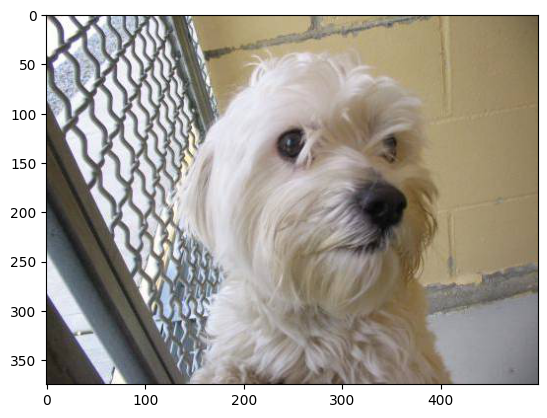

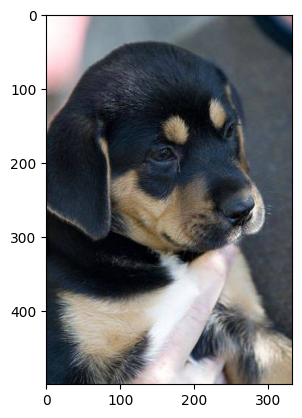

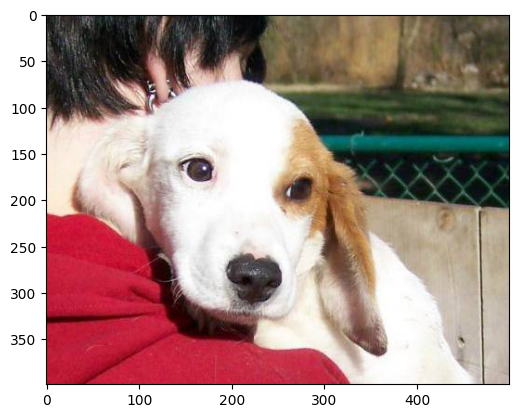

In [86]:
# Afficher 3 images de la classe 'dogs' où le modèle s'est trompé
nb = 0
for i in range(len(y_test)):
    if (y_test[i] == 1 and y_pred_class[i] == 0):  # Si la prédiction est incorrecte
        image_path = os.path.join(val_path, img_filenames[i])
        image = imread(image_path)
        plt.imshow(image)
        plt.show()
        nb += 1
        if nb == 3:
            break

### 9.2 Ces images ont-elles des patterns en commun ?

Les trois images des chiens affichées ci-dessus sont toutes caractérisées par le fait que la photo fait un zoom sur la tête du chien et n'affiche pas le reste de son corps. De plus, les oreilles du chien ne sont pas assez tendues dans les trois images.

Quant aux images des chats, les trois images affichées présentent trois patterns différents. La première image montre un chat dont les traits de son visage ne sont pas visibles, la deuxième image affiche un chat qui serpente sur soi-même cachant sa silhouette, alors que la troisième image affiche un chat avec des yeux lumineux.

# 10) Data augmentation (optionnel)

Afin d'améliorer la performance de notre modèle, nous allons par la suite enrichir le training set à partir des images initiales en utilisant les techniques de Data Augmentation. Nous allons ainsi effectuer des transformations en temps réel sur les images stockées dans le répertoire 'train' à travers l'objet ImageDataGenerator, puis nous réentrainons notre modèle sur les images transformées (augmentées).


### 10.1 Entrainement du modèle sur des nouvelles images

Nous avons opté pour trois augmentations d'images différentes, sur lesquelles on a entrainé le modèle successivement.

In [91]:
# initialiser le modèle à augmenter par le modèle actuel
model_aug = model

In [92]:
# Première augmentation : Rotation, Cisaillement et Déplacement
data_aug_rotation = ImageDataGenerator( rescale=1/255,             # Normalisation des pixels
                                        rotation_range=30,         # Rotation aléatoire entre -30 et 30 degrés
                                        shear_range=0.1,           # Cisaillement de 10%
                                        width_shift_range=0.1,     # Déplacement horizontal aléatoire de 10%
                                        height_shift_range=0.1,    # Déplacement vertical aléatoire de 10%
                                        fill_mode='nearest'        # Remplir les pixels vides
                                       )

augmented_images = data_aug_rotation.flow_from_directory( train_path,
                                                          target_size=(360, 360),
                                                          color_mode='rgb',
                                                          batch_size=64,
                                                          class_mode='binary'  
                                                         )

model_aug.fit(augmented_images,
              epochs=30,
              validation_data=val_image_generator,
              callbacks=[early_stop]
              )


Found 2000 images belonging to 2 classes.
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8889 - loss: 0.2649 - val_accuracy: 0.8210 - val_loss: 0.4142
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.8910 - loss: 0.2499 - val_accuracy: 0.8320 - val_loss: 0.3964
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8946 - loss: 0.2300 - val_accuracy: 0.8360 - val_loss: 0.4350
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8963 - loss: 0.2434 - val_accuracy: 0.8200 - val_loss: 0.4465
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9091 - loss: 0.2371 - val_accuracy: 0.8160 - val_loss: 0.4074


In [93]:
# Deuxième augmentation : Zoom, Cisaillement et Déplacement
data_aug_zoom = ImageDataGenerator( rescale=1/255,             # Normalisation des pixels
                                    zoom_range=0.4,            # Zoom aléatoire de 40%
                                    shear_range=0.1,           # Cisaillement de 10%
                                    width_shift_range=0.1,     # Déplacement horizontal aléatoire de 10%
                                    height_shift_range=0.1,    # Déplacement vertical aléatoire de 10%
                                    fill_mode='nearest'        # Remplir les pixels vides
                                   )

augmented_images = data_aug_zoom.flow_from_directory( train_path,
                                                      target_size=(360, 360),
                                                      color_mode='rgb',
                                                      batch_size=64,
                                                      class_mode='binary'  
                                                     )

model_aug.fit(augmented_images,
              epochs=30,
              validation_data=val_image_generator,
              callbacks=[early_stop]
              )

Found 2000 images belonging to 2 classes.
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8693 - loss: 0.2788 - val_accuracy: 0.8230 - val_loss: 0.4327
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9047 - loss: 0.2295 - val_accuracy: 0.8170 - val_loss: 0.4263
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9163 - loss: 0.2009 - val_accuracy: 0.8280 - val_loss: 0.4410
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8980 - loss: 0.2500 - val_accuracy: 0.8360 - val_loss: 0.4279
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9135 - loss: 0.2050 - val_accuracy: 0.8170 - val_loss: 0.4759


In [94]:
# Troisième augmentation : Retour horizontal, Cisaillement et Déplacement
data_aug_flip = ImageDataGenerator( rescale=1/255,             # Normalisation des pixels
                                    horizontal_flip=True,      # Retourner les images horizontalement
                                    shear_range=0.1,           # Cisaillement de 10%
                                    width_shift_range=0.1,     # Déplacement horizontal aléatoire de 10%
                                    height_shift_range=0.1,    # Déplacement vertical aléatoire de 10%
                                    fill_mode='nearest'        # Remplir les pixels vides 
                                   )

augmented_images = data_aug_flip.flow_from_directory( train_path,
                                                      target_size=(360, 360),
                                                      color_mode='rgb',
                                                      batch_size=64,
                                                      class_mode='binary'  
                                                     )

model_aug.fit(augmented_images,
              epochs=30,
              validation_data=val_image_generator,
              callbacks=[early_stop]
              )

Found 2000 images belonging to 2 classes.
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9149 - loss: 0.2201 - val_accuracy: 0.8210 - val_loss: 0.4192
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9064 - loss: 0.2304 - val_accuracy: 0.8340 - val_loss: 0.4060
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9230 - loss: 0.1851 - val_accuracy: 0.8480 - val_loss: 0.4053
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9223 - loss: 0.1989 - val_accuracy: 0.8270 - val_loss: 0.3874
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9283 - loss: 0.1790 - val_accuracy: 0.8330 - val_loss: 0.4137
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9253 - loss: 0.1776 - val_accuracy: 0.8470 - val_loss: 0.4094
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9154 - loss: 0.1884 - val_accuracy: 0.8410 - val_loss: 0.4058


### 10.2 Evaluation du modèle augmenté

In [95]:
# Calculer les probabilités pour le val_image_generator
y_pred_proba_aug = model_aug.predict(val_image_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step


In [96]:
# Transformer ces probabilités en classes en prenant un threshold de 0.5
y_pred_class_aug = y_pred_proba_aug > 0.5
y_pred_class_aug = np.array([int(x) for x in y_pred_class_aug])
y_pred_class_aug

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred_class_aug))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       500
           1       0.89      0.77      0.83       500

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [98]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, y_pred_class_aug))

[[454  46]
 [113 387]]


##### Commentaire :
Avec la technique de Data Augmentation, nous avons pu améliorer l'accuracy de notre modèle sur les données de test de 5%, pour atteindre 84%. Nous avons également amélioré sa capacité de généralisation en réduisant nettement le surapprentissage. Ainsi, nous pouvons affirmer qu'on a pu entrainer un modèle qui est plutôt performant.

### 10.3 Prédictions sur des cas particuliers

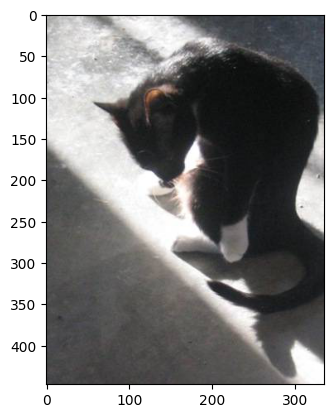

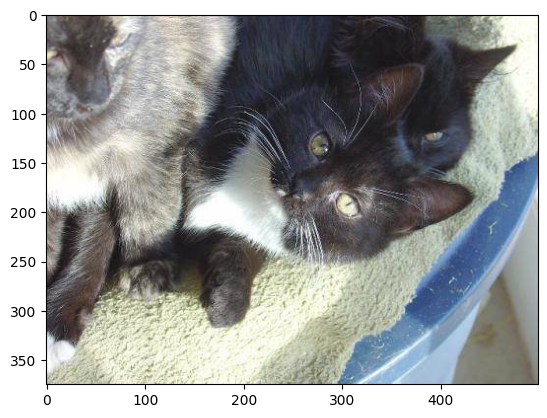

In [102]:
# Afficher 2 images de la classe 'cats' où le modèle augmenté s'est trompé
nb = 0
for i in range(len(y_test)):
    if (y_test[i] == 0 and y_pred_class_aug[i] == 1):  # Si la prédiction est incorrecte
        image_path = os.path.join(val_path, img_filenames[i])
        image = imread(image_path)
        plt.imshow(image)
        plt.show()
        nb += 1
        if nb == 2:
            break

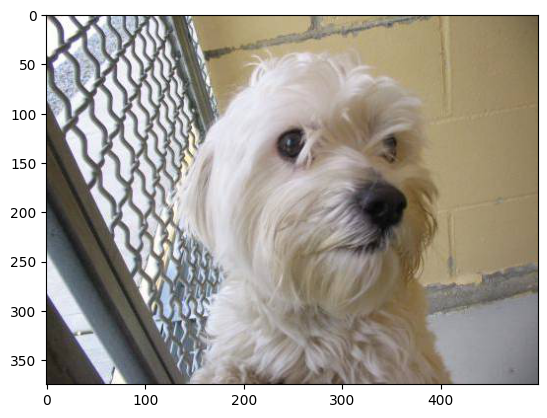

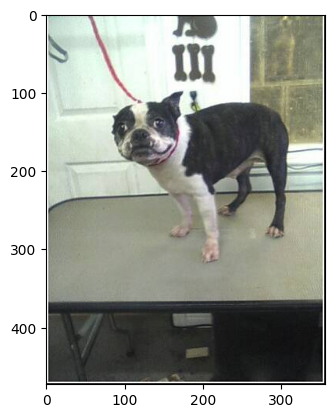

In [103]:
# Afficher 2 images de la classe 'dogs' où le modèle augmenté s'est trompé
nb = 0
for i in range(len(y_test)):
    if (y_test[i] == 1 and y_pred_class_aug[i] == 0):  # Si la prédiction est incorrecte
        image_path = os.path.join(val_path, img_filenames[i])
        image = imread(image_path)
        plt.imshow(image)
        plt.show()
        nb += 1
        if nb == 2:
            break

### Commentaire :
D'après cet échantillon d'images où le modèle augmenté s'est trompé, nous pouvons constater que le modèle n'arrive pas encore à prédire correctement les images où les traits et la silhouette de l'animal ne sont pas assez clairs et distinctifs.

# 11) Transfer learning

Afin d'avoir un modèle avec une meilleure performance, nous explorons dans ce paragraphe l'utilisation de la technique de transfer learning à partir d'un modèle open source pré-entrainé.

Dans la litérature, il existe plusieurs modèles open source efficace pour la classification des images. L'un des modèles les plus populaires et qui est très utile pour l'apprentissage par transfert est le modèle **VGG-16** qui, avec 16 couches, a obtenu les meilleurs résultats au défi de classification des photos ImageNet.


### 11.1 Entrainer le nouveau modèle

In [24]:
# Importer le modèle open source VGG16
from tensorflow.keras.applications import VGG16

# Charger le modèle pré-entraîné VGG16 (sans la partie finale de classification)
model_base = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)

# Geler les poids du modèle de base
model_base.trainable = False

# Construire un nouveau modèle à partir du modèle de base
model_transf = Sequential([ model_base,
                            Flatten(),
                            Dense(256, activation='relu'),
                            Dropout(0.3),
                            Dense(1, activation='sigmoid')  # Classification binaire
                          ])

# Compiler le modèle
model_transf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher la structure du modèle
model_transf.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 11, 11, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,574,913 (116.63 MB)

 Trainable params: 15,860,225 (60.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
# Entrainer le nouveau modèle
model_transf.fit( train_image_generator,
                  epochs=30,
                  validation_data=val_image_generator,
                  callbacks=[early_stop]
                 )

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 405s 13s/step - accuracy: 0.5445 - loss: 4.8923 - val_accuracy: 0.7920 - val_loss: 0.4469
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 403s 13s/step - accuracy: 0.8244 - loss: 0.3843 - val_accuracy: 0.8820 - val_loss: 0.2655
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 404s 13s/step - accuracy: 0.9111 - loss: 0.2325 - val_accuracy: 0.9030 - val_loss: 0.2405
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 405s 13s/step - accuracy: 0.9415 - loss: 0.1679 - val_accuracy: 0.9060 - val_loss: 0.2253
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 401s 13s/step - accuracy: 0.9588 - loss: 0.1312 - val_accuracy: 0.9040 - val_loss: 0.2210
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 403s 13s/step - accuracy: 0.9712 - loss: 0.1092 - val_accuracy: 0.9120 - val_loss: 0.2138
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 401s 13s/step - accuracy: 0.9829 - loss: 0.0838 - val_accuracy: 0.9090 - val_loss: 0.2156
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 402s 13s/step - accuracy: 0.9898 - loss: 0.0658 - val_accuracy: 0.

### 11.2 Evaluer le nouveau modèle

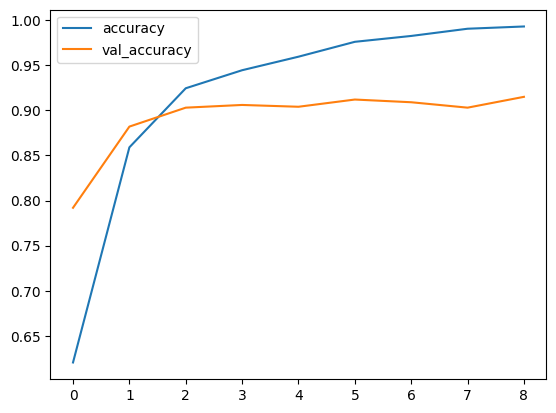

In [26]:
# Afficher le graphe de l'accuracy pour l'entrainement et la validation
losses_transf = pd.DataFrame(model_transf.history.history)
losses_transf[['accuracy','val_accuracy']].plot()
plt.show()

In [27]:
# Calculer les probabilités pour le val_image_generator
y_pred_proba_transf = model_transf.predict(val_image_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 135s 8s/step


In [28]:
# Transformer ces probabilités en classes en prenant un threshold de 0.5
y_pred_class_transf = y_pred_proba_transf > 0.5
y_pred_class_transf = np.array([int(x) for x in y_pred_class_transf])
y_pred_class_transf

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [33]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred_class_transf))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       500
           1       0.89      0.95      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.91      1000
weighted avg       0.92      0.92      0.91      1000



In [34]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, y_pred_class_transf))

[[442  58]
 [ 27 473]]


## Commentaire :
Avec la technique de Transfer Learning, notre modèle de classification a atteint une très bonne performance avec une accuracy sur les données de test de 92%. Nous constatons égalemement un parfait équilibre entre les deux classes (cats et dogs) en terme de f1-score (autour de 92%).

Ainsi, le modèle 'model_transf' sera le modèle retenu pour la phase de déploiement.

# 12) Déploiement

Après construction d'une version finale et performante de notre modèle de classification, nous procédons par la suite au sauvegarde dudit modèle.


In [35]:
# Sauvegarder le modèle final
from tensorflow.keras.models import save_model
save_model(model_transf,'Cat_or_Dog_Model.keras')

Afin de déployer le modèle définitif construit et sauvegardé, nous avons développé une application Web qui permet à un utilisateur de se connecter à son URL, charger une image de chien ou de chat et obtenir en retour la classe prédite par le modèle.

Outils de déploiement : streamlit pour le développement de la webapp & render pour le hosting